# First Kernel - Olympic Games 

Hey, thanks for viewing my first Kernel! 
My name is David and I've been learning Data Science for a month.  


**Content**

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name 
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season 
10. Year - Integer
11. Season - Summer or Winter
12. CIty - Host city 
13. Sport - Sport
14. Event - Event 
15. Medal - Gold, Silver, Bronze, or NA

![](http://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png)


# Content:

# 1. Importing the modules

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Importing Data 

In [10]:
events = pd.read_csv('input/athlete_events.csv')
regions = pd.read_csv('input/noc_regions.csv')

# 3. Information about EVENTS and REGIONS

In [11]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [12]:
events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [13]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [14]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [15]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


# 4. Connecting Data
The best option to connect two databases is function merge()
[Documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html)

In [16]:
data = pd.merge(events,regions,on='NOC',how='left')

From now, we will use DATA

In [17]:
data.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
151295,75932,Yuliya Viktorovna Martisova,F,32.0,169.0,64.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Cycling,"Cycling Women's Road Race, Individual",NaN,Russia,NaN
42719,22040,"Elisabeth Anne ""Betsy"" Clifford (-Higgins)",F,22.0,162.0,57.0,Canada,CAN,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Women's Slalom,NaN,Canada,NaN
207746,104263,Hayley Dawn Sage,F,22.0,158.0,58.0,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Synchronized Springboard,NaN,UK,NaN
176769,88882,Jon C. Olsen,M,23.0,195.0,82.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold,USA,NaN
7655,4261,"Kang Keam ""Anthony"" Ang",M,21.0,175.0,70.0,Malaysia,MAS,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN,Malaysia,NaN


In [18]:
data.shape

(271116, 17)

# 5. Missing data

In [19]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

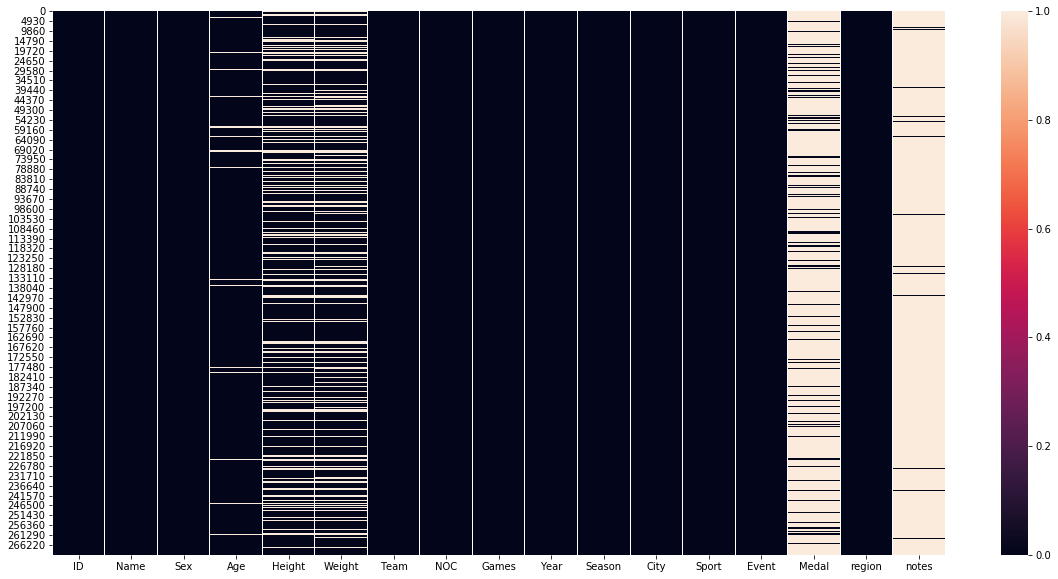

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(),cbar='False');

# 6. Basic Information about SEX, AGE, HEIGHT, WEIGHT

In [21]:
print('Total athletes in Olympic Games (unique): ', len(data['ID'].unique())) #I use unique(), beacause it shows the real number of players without duplication.

Total athletes in Olympic Games (unique):  135571


In [22]:
print("Total womens in Olympic Games:", len(data[data.Sex== 'F']))
print("Total mens in Olympic Games:", len(data[data.Sex== 'M']))

Total womens in Olympic Games: 74522
Total mens in Olympic Games: 196594


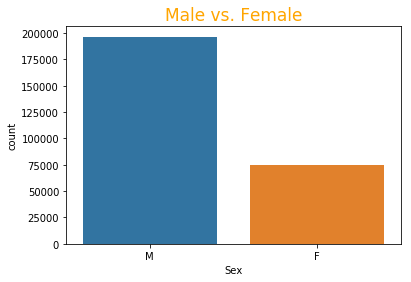

In [23]:
sns.countplot(data.Sex)
plt.title('Male vs. Female', color = 'orange', size=17)
plt.show();

# 6.1 Age

In [24]:
print('Avarge age:', data.Age.mean())
print('Minimum age:', data.Age.min())
print('Maximum age:', data.Age.max())

Avarge age: 25.556898357297374
Minimum age: 10.0
Maximum age: 97.0


## The youngest athlete:

In [25]:
data.loc[(data['Age'] == data['Age'].min())]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,NaN


## The oldest athlete:

In [26]:
data.loc[(data['Age'] == data['Age'].max())]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


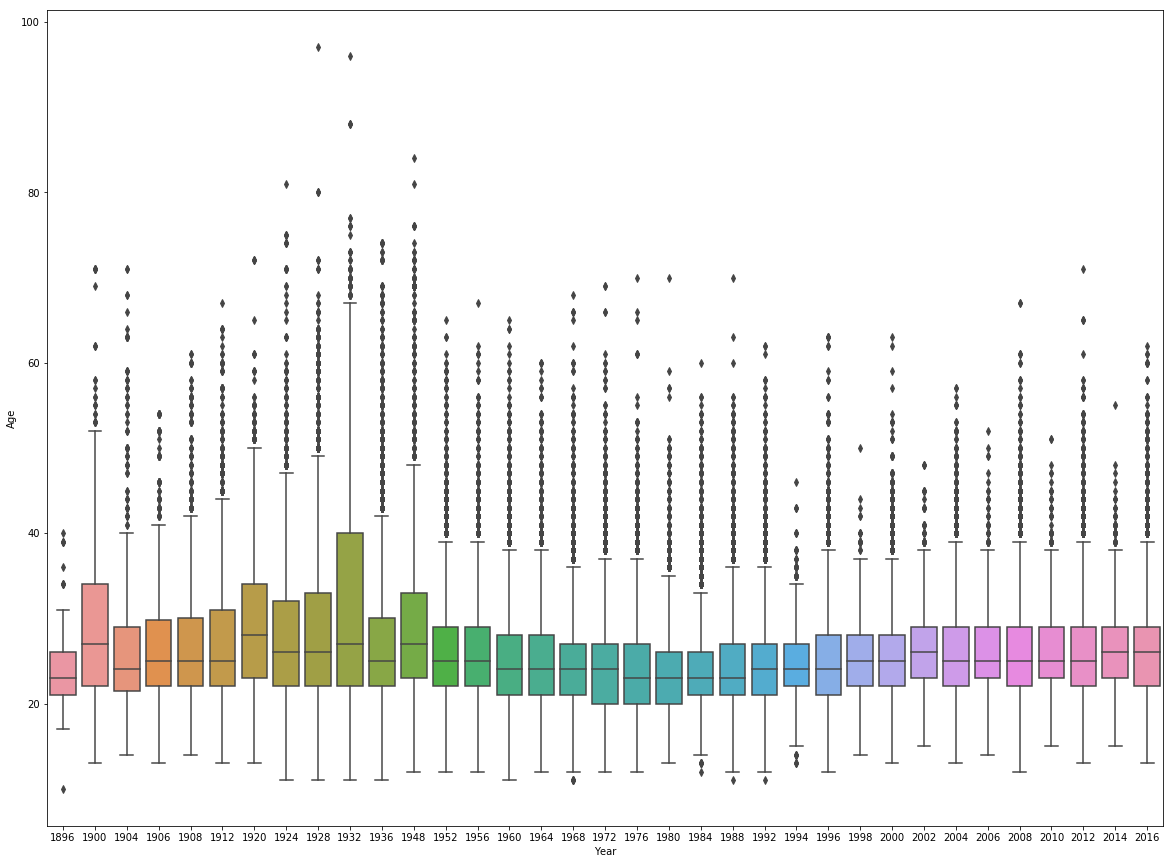

In [27]:
plt.figure(figsize=(20,15))
sns.boxplot('Year', 'Age', data=data)

# 6.2 Height

In [28]:
print('Average Height:', data['Height'].mean())
print('Minimum Height:', data['Height'].min())
print('Maximum Height:', data['Height'].max())

Average Height: 175.33896987366376
Minimum Height: 127.0
Maximum Height: 226.0


## The highest athlete:

In [29]:
data.loc[(data['Height'] == data['Height'].max())].head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,China,NaN


## The lowest athlete (2 person)

In [30]:
data.loc[(data['Height'] == data['Height'].min())].head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Mexico,NaN


In [31]:
data.loc[(data['Height'] == data['Height'].min())].tail(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN,Malawi,NaN


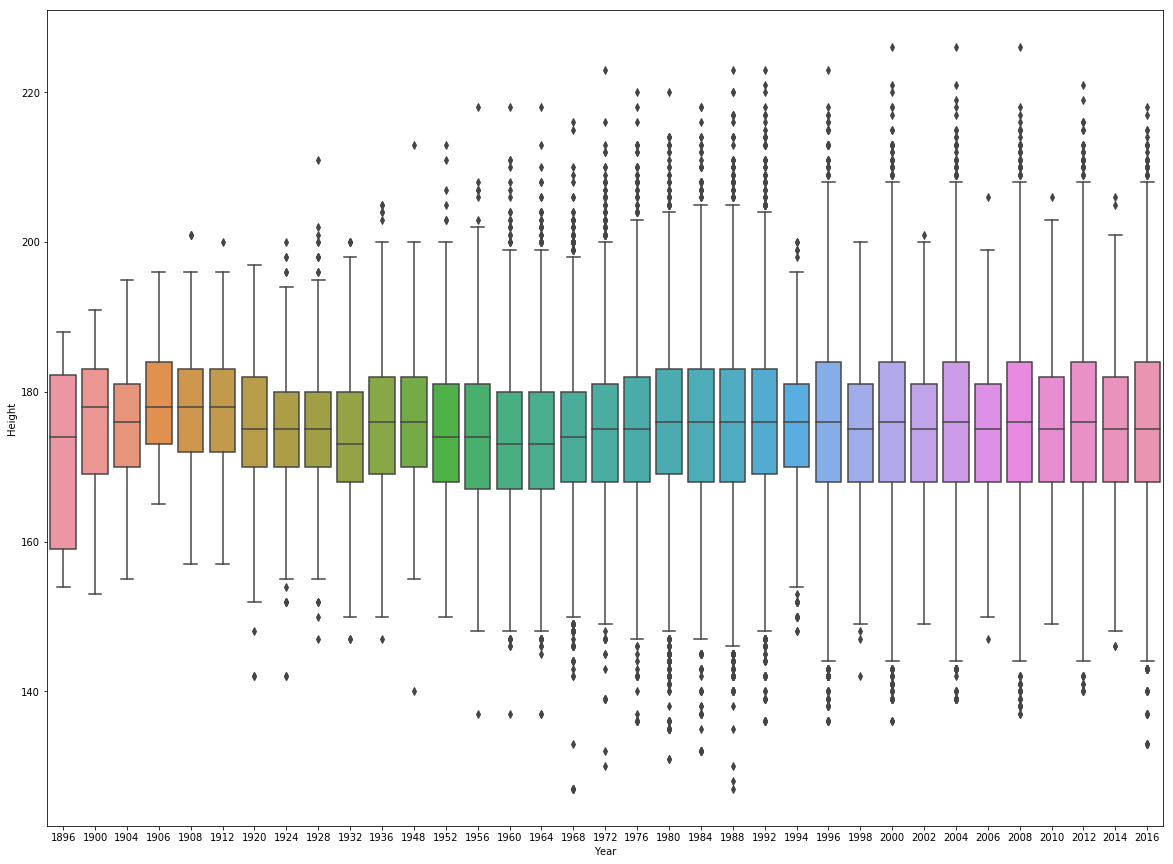

In [32]:
plt.figure(figsize=(20,15))
sns.boxplot('Year', 'Height', data=data)

# 6.3 Weight

In [33]:
print('Average Weight:', data['Weight'].mean())
print('Minimum Weight:', data['Weight'].min())
print('Maximum Weight:', data['Weight'].max())

Average Weight: 70.70239290053351
Minimum Weight: 25.0
Maximum Weight: 214.0


## Maximum Weight:

In [34]:
data.loc[(data['Weight'] == data['Weight'].max())].head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN,Guam,NaN


## Minimum Weight:

In [35]:
data.loc[(data['Weight'] == data['Weight'].min())].head(1) 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN,North Korea,NaN


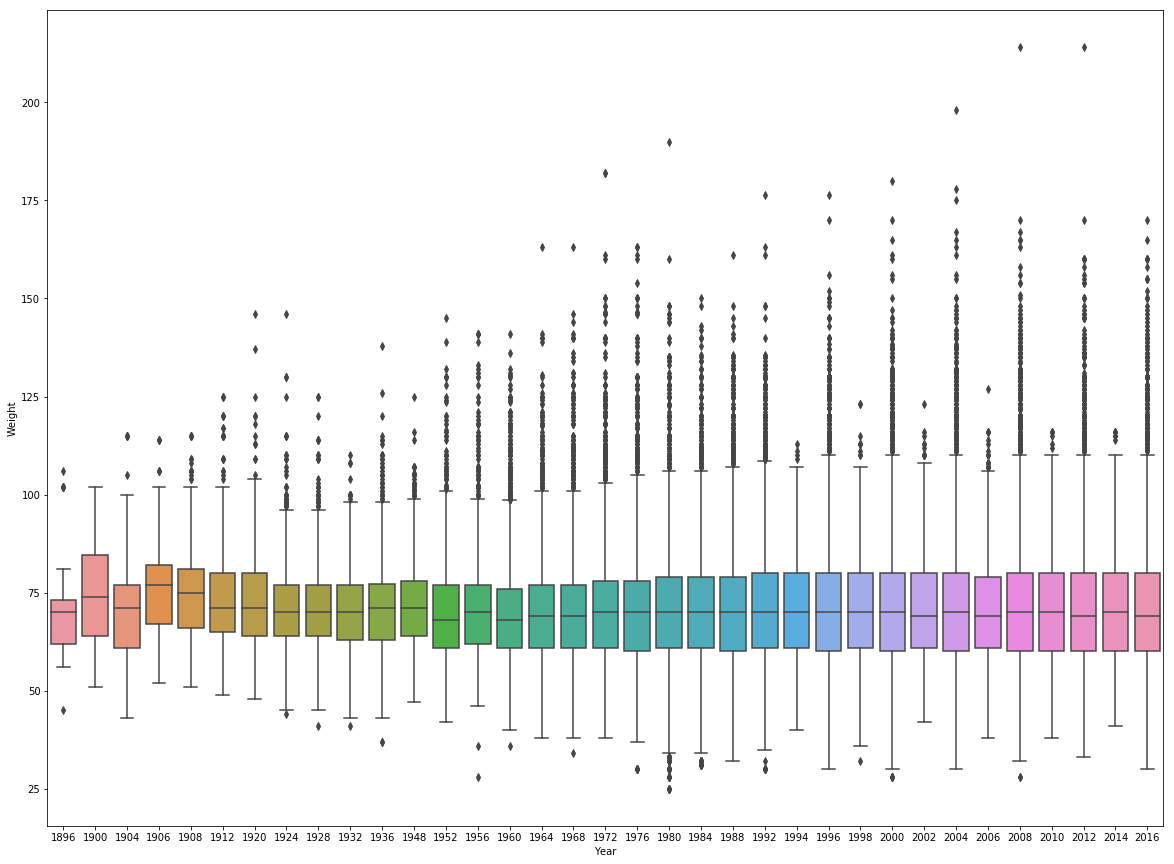

In [36]:
plt.figure(figsize=(20,15))
sns.boxplot('Year', 'Weight', data=data)

# 7. Correlation Age, Height and Weight

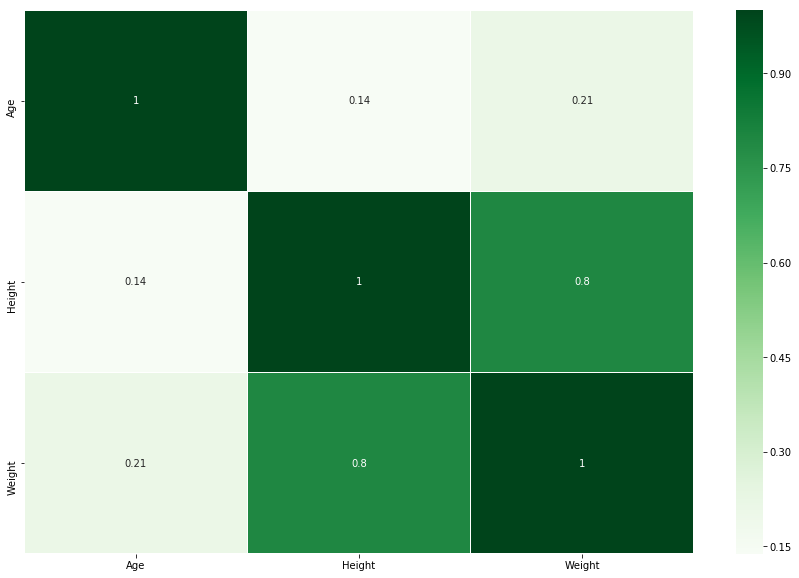

In [37]:
corr = data[['Age','Height','Weight']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,lw=.8, cmap="Greens")

# 8. Medals


# 8.1  Medals by country

In [38]:
def medal(medal): 
        x = data[data.Medal == medal].region.value_counts().head(10)
        x.plot(kind='bar',figsize=(15,10))
        plt.title(medal + ' medals',size=15)
        plt.show()

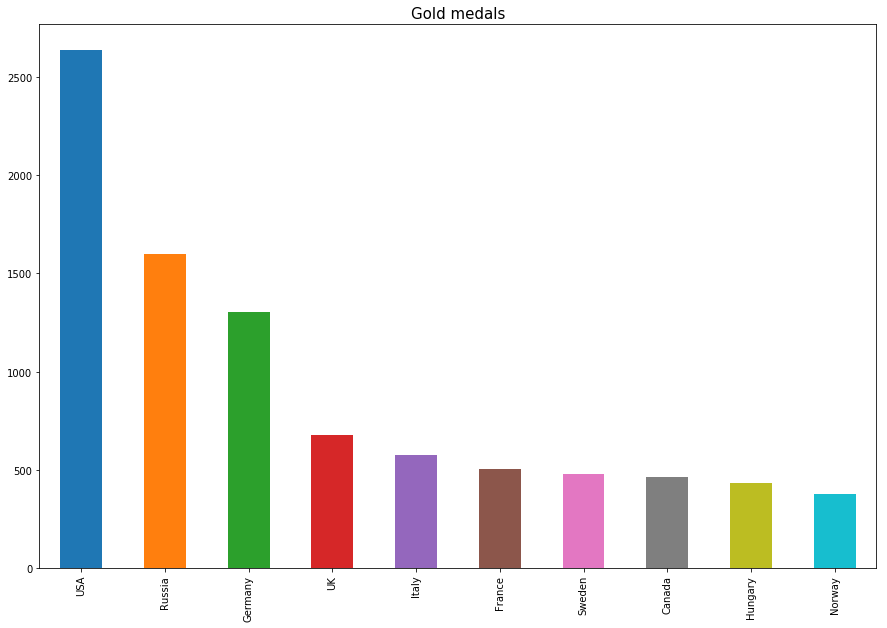

In [39]:
medal('Gold')

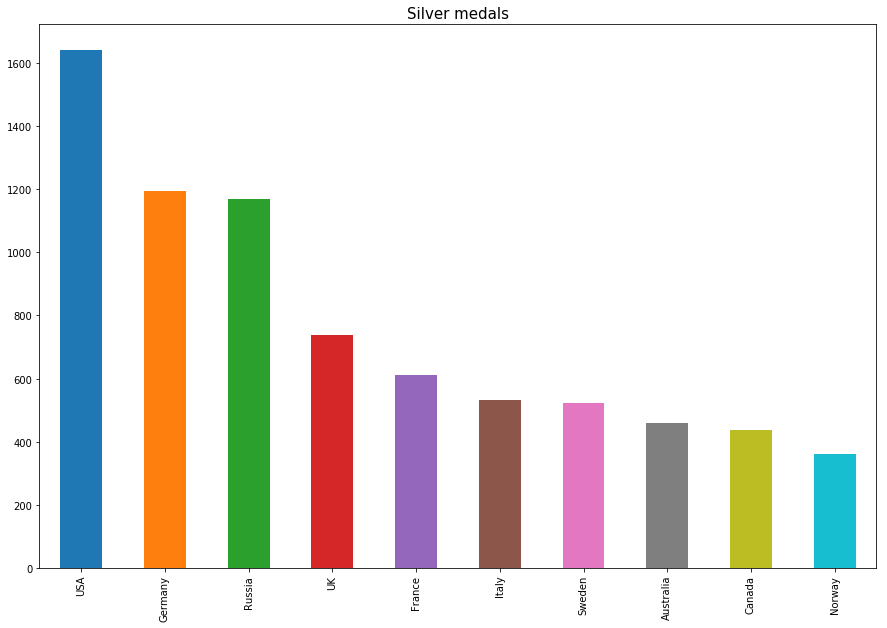

In [40]:
medal('Silver')

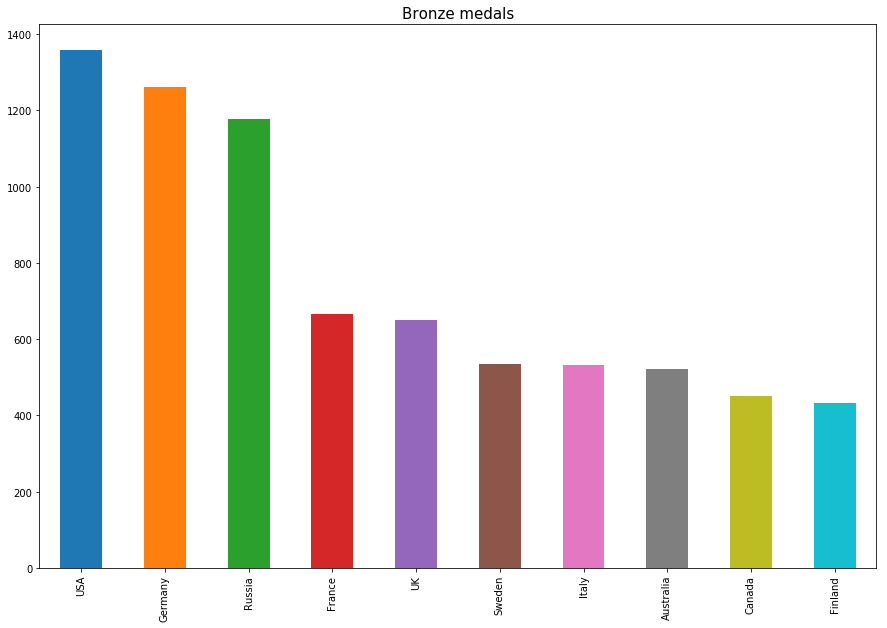

In [41]:
medal('Bronze')

# 8.2 Medals by sex

In [42]:
def medal_by_sex(medal):
    x = data[data.Medal == medal].Sex.value_counts().head(10)
    x.plot(kind='bar',figsize=(15,10))
    plt.title(medal + ' medals')
    print(x)
    plt.show();

M    9625
F    3747
Name: Sex, dtype: int64


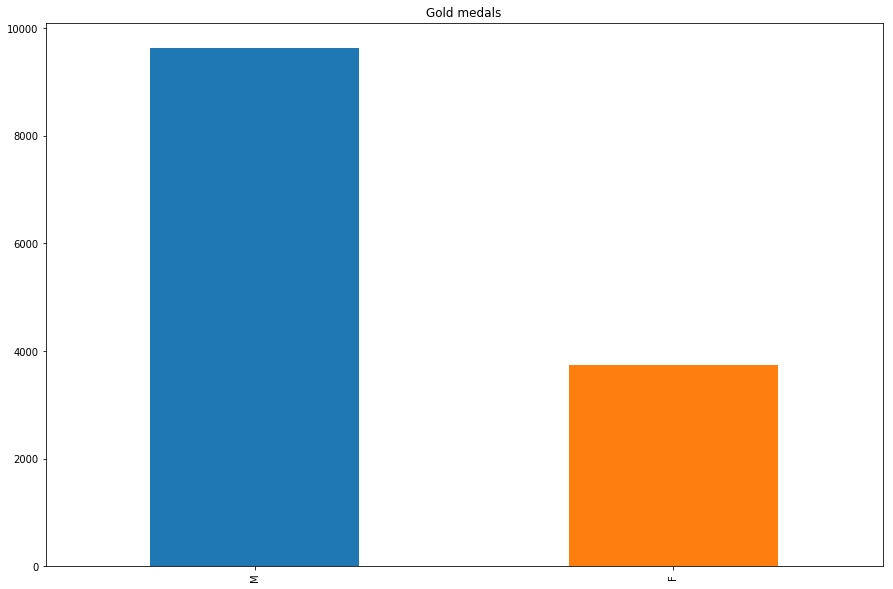

In [43]:
medal_by_sex('Gold')

M    9381
F    3735
Name: Sex, dtype: int64


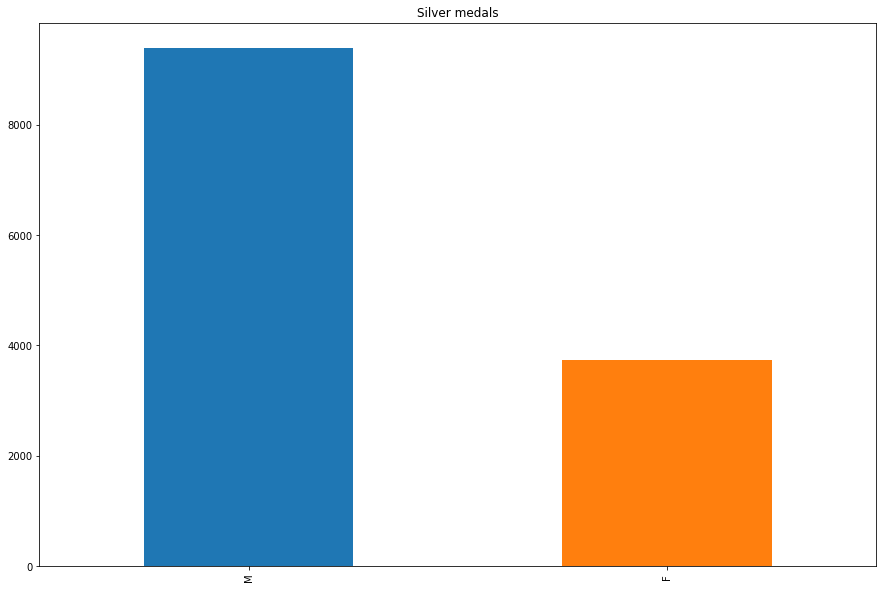

In [44]:
medal_by_sex('Silver')

M    9524
F    3771
Name: Sex, dtype: int64


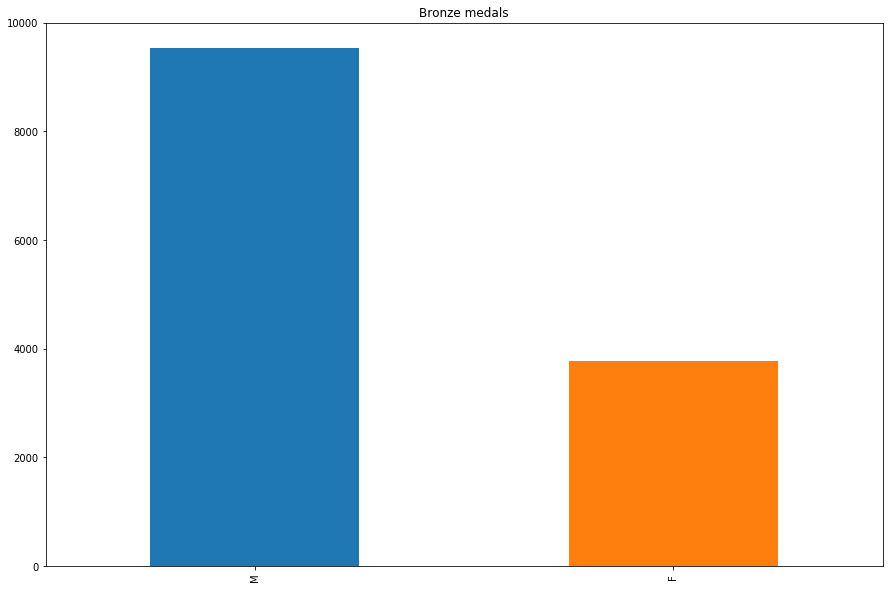

In [45]:
medal_by_sex('Bronze')

# 9. Womens for the Olympic Games

## Summer Olympic Games:

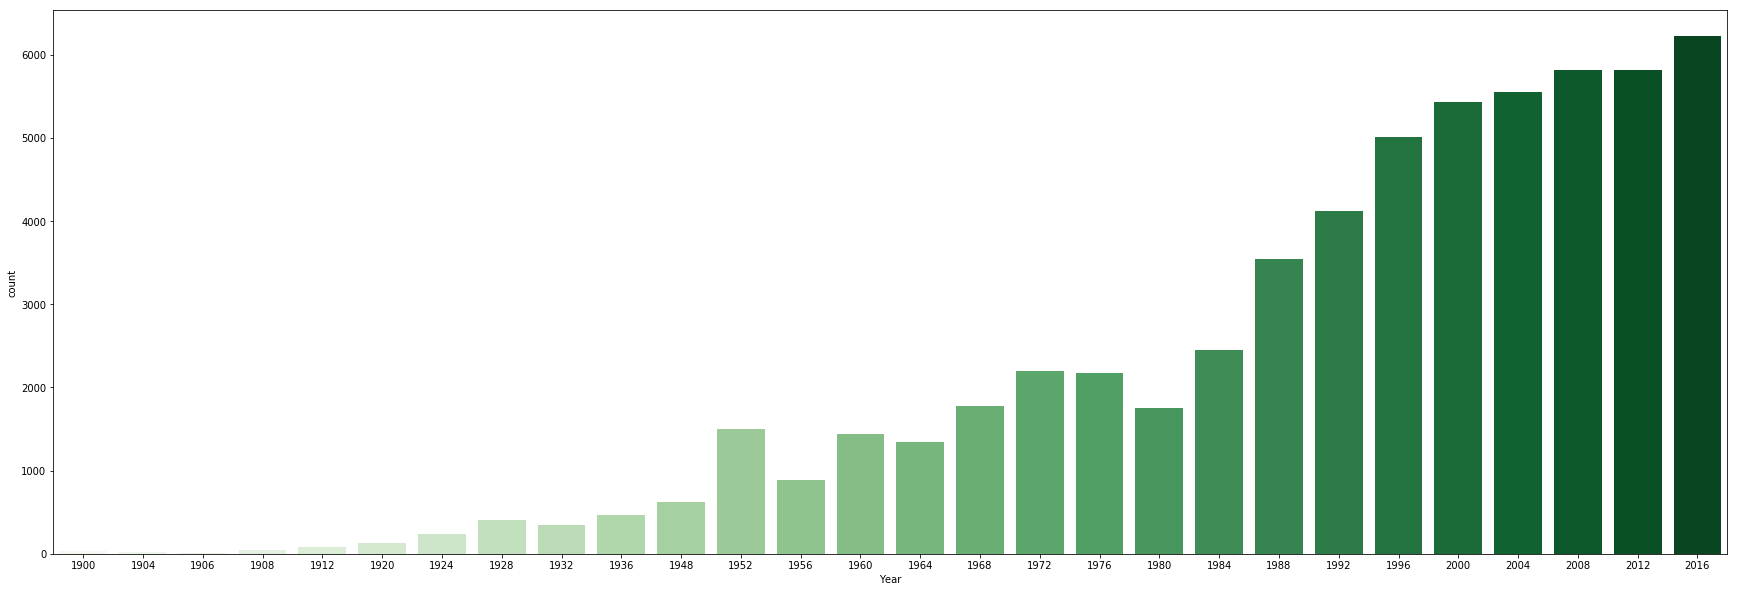

In [46]:
womens_in_summer_olympic = data[(data.Sex == 'F')&(data.Season == 'Summer')]
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=womens_in_summer_olympic,palette='Greens');

## Winter Olympic Games:

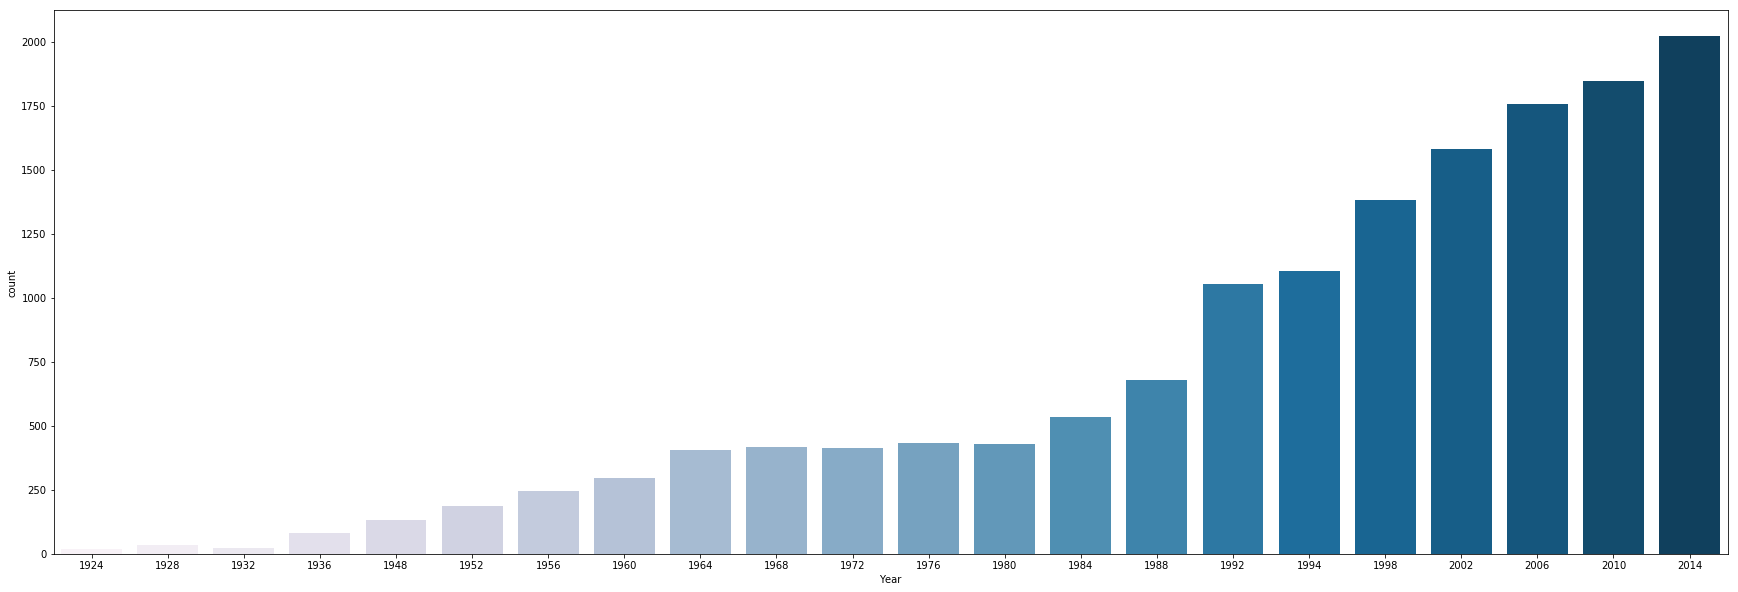

In [47]:
womens_in_winter_olympic = data[(data.Sex == 'F')&(data.Season == 'Winter')]
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=womens_in_winter_olympic,palette='PuBu');

## Summer & Winter Olympic Games

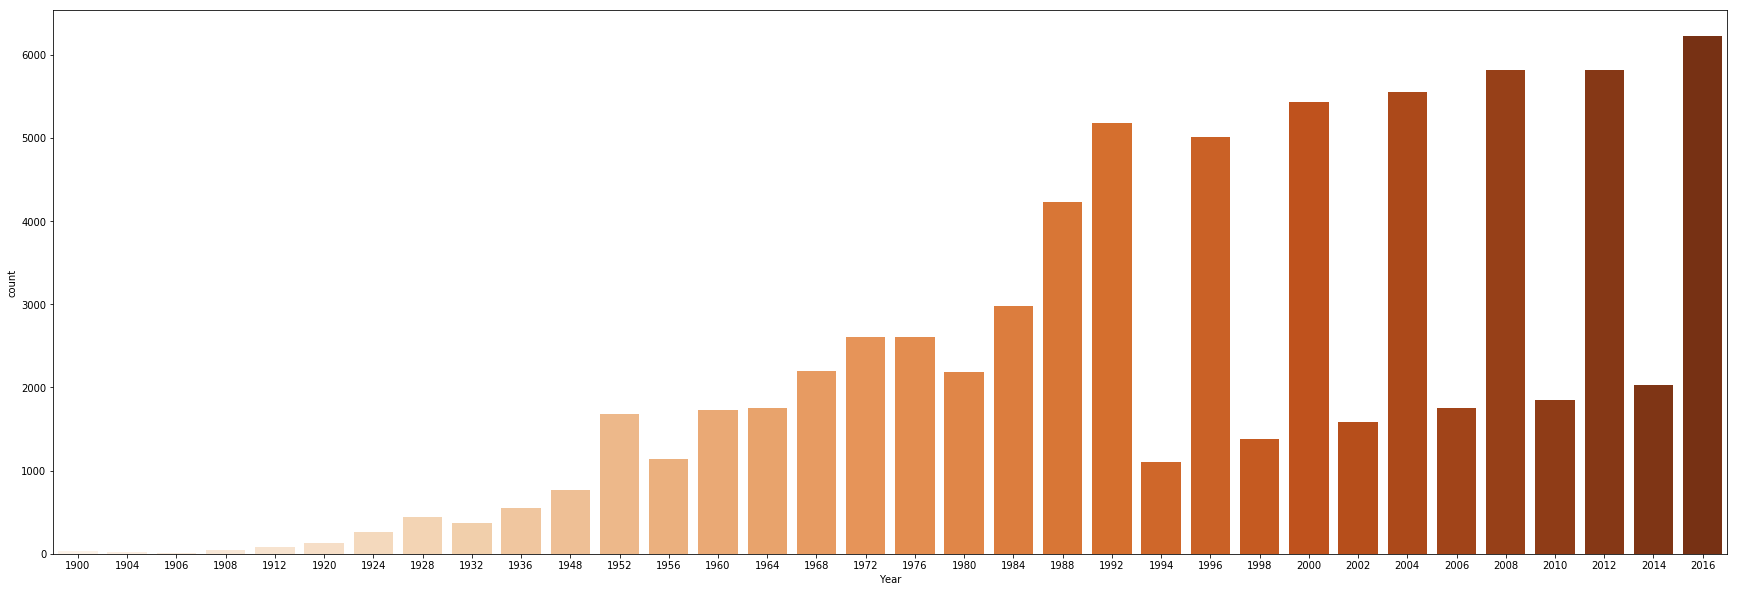

In [48]:
womens_in_olympic = data[data.Sex == 'F']
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=womens_in_olympic,palette='Oranges');

 # Gold medals for womens

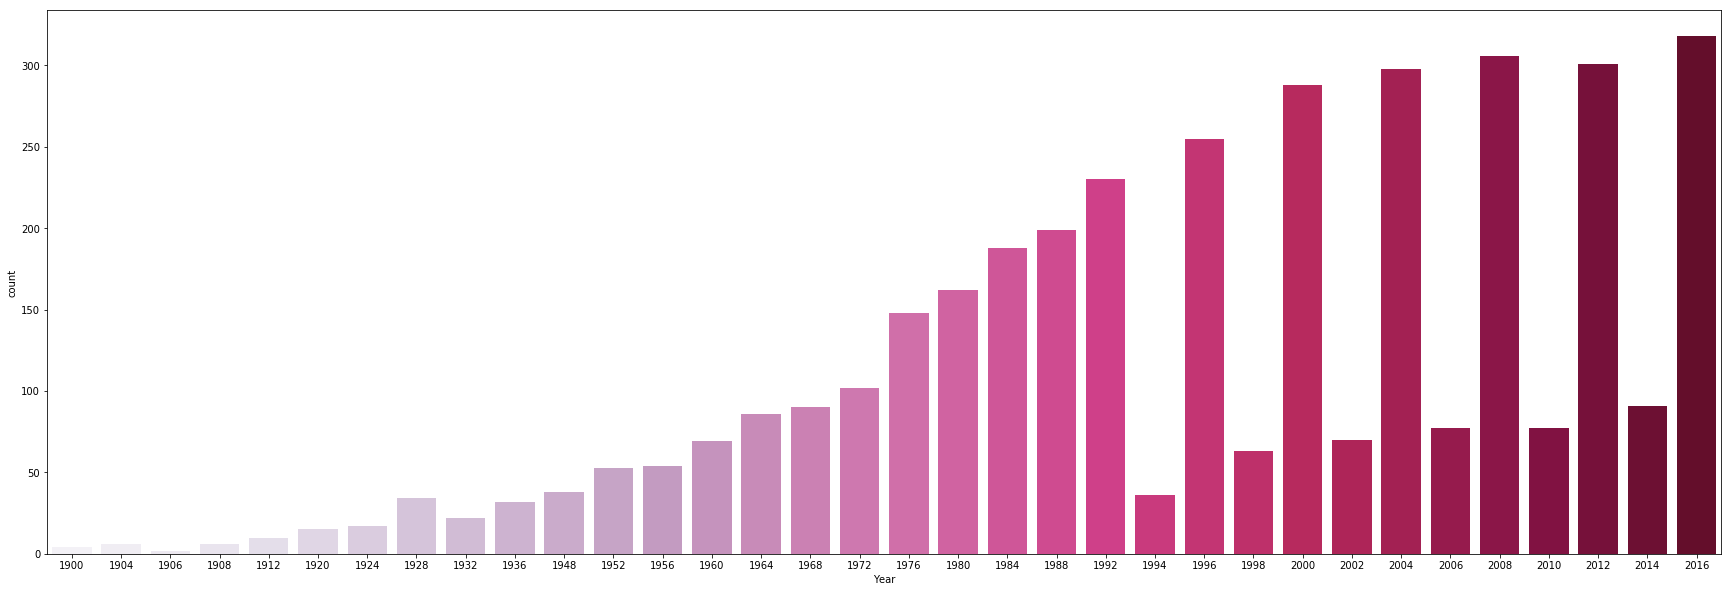

In [49]:
womens_medals_in_olympic = data[((data.Sex == 'F') & (data.Medal == 'Gold'))]
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=womens_medals_in_olympic,palette='PuRd');

# 10. Mens for the Olympic Games

## Summer Olympic Games

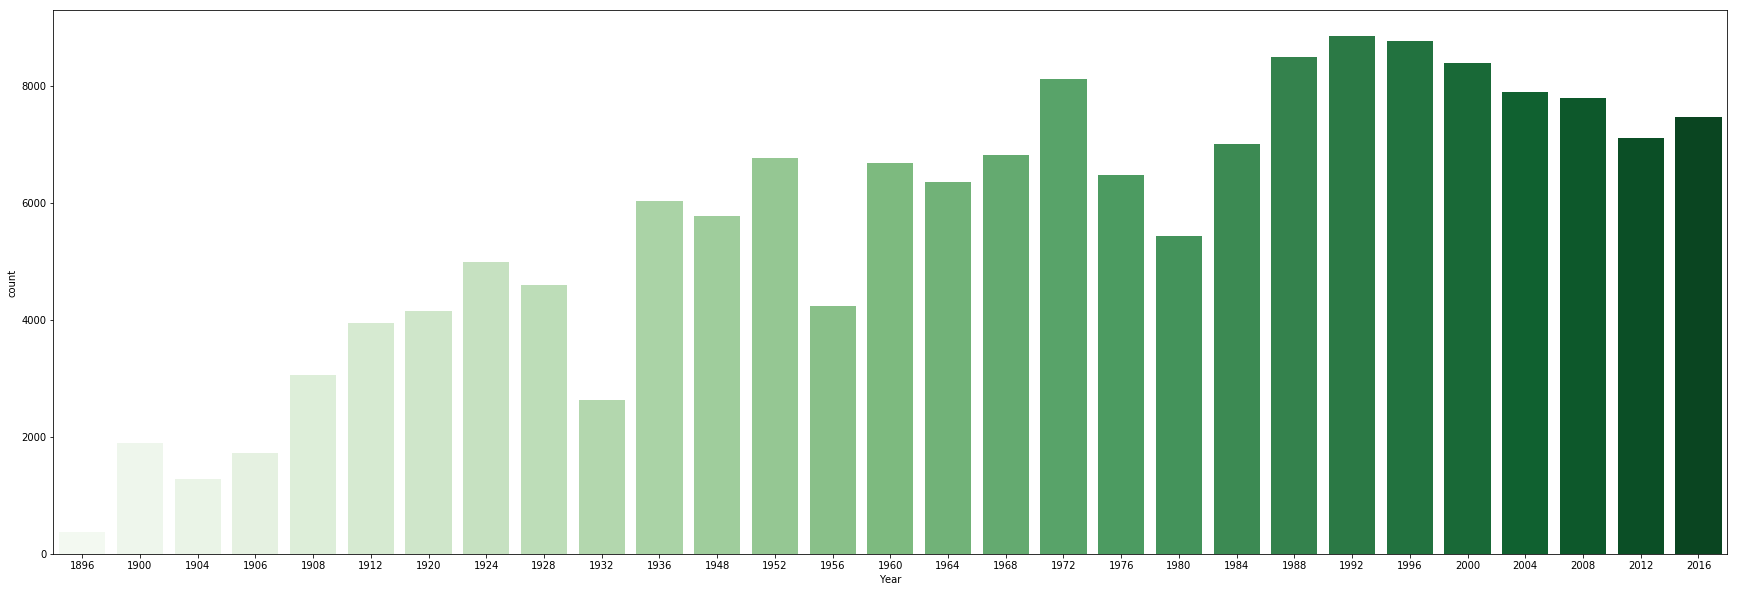

In [50]:
mens_in_summer_olympic = data[(data.Sex == 'M')&(data.Season == 'Summer')]
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=mens_in_summer_olympic,palette='Greens');

## Winter Olympic Games

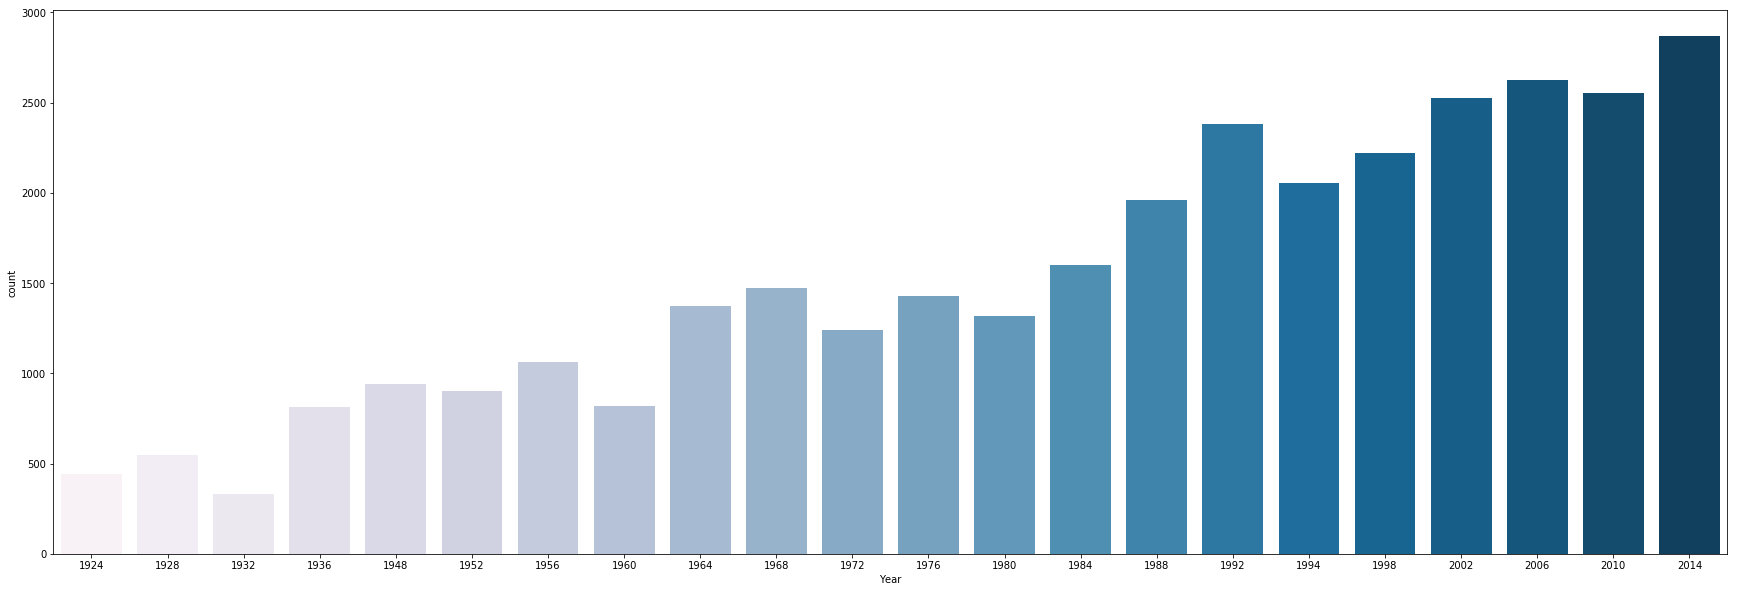

In [51]:
mens_in_winter_olympic = data[(data.Sex == 'M')&(data.Season == 'Winter')]
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=mens_in_winter_olympic,palette='PuBu');

## Summer & Winter Olympic Games

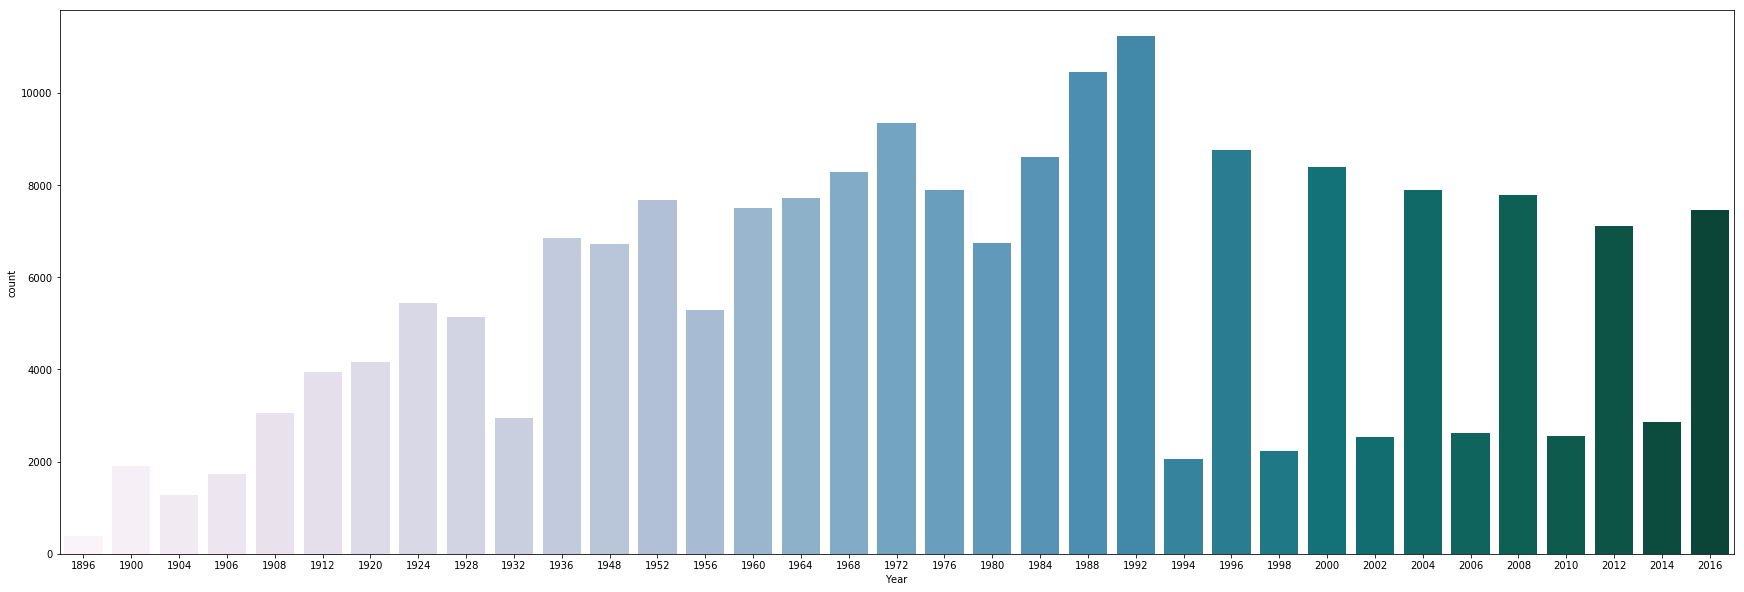

In [52]:
mens_in_olympic = data[data.Sex == 'M']
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=mens_in_olympic,palette='PuBuGn');

# Gold medals for men

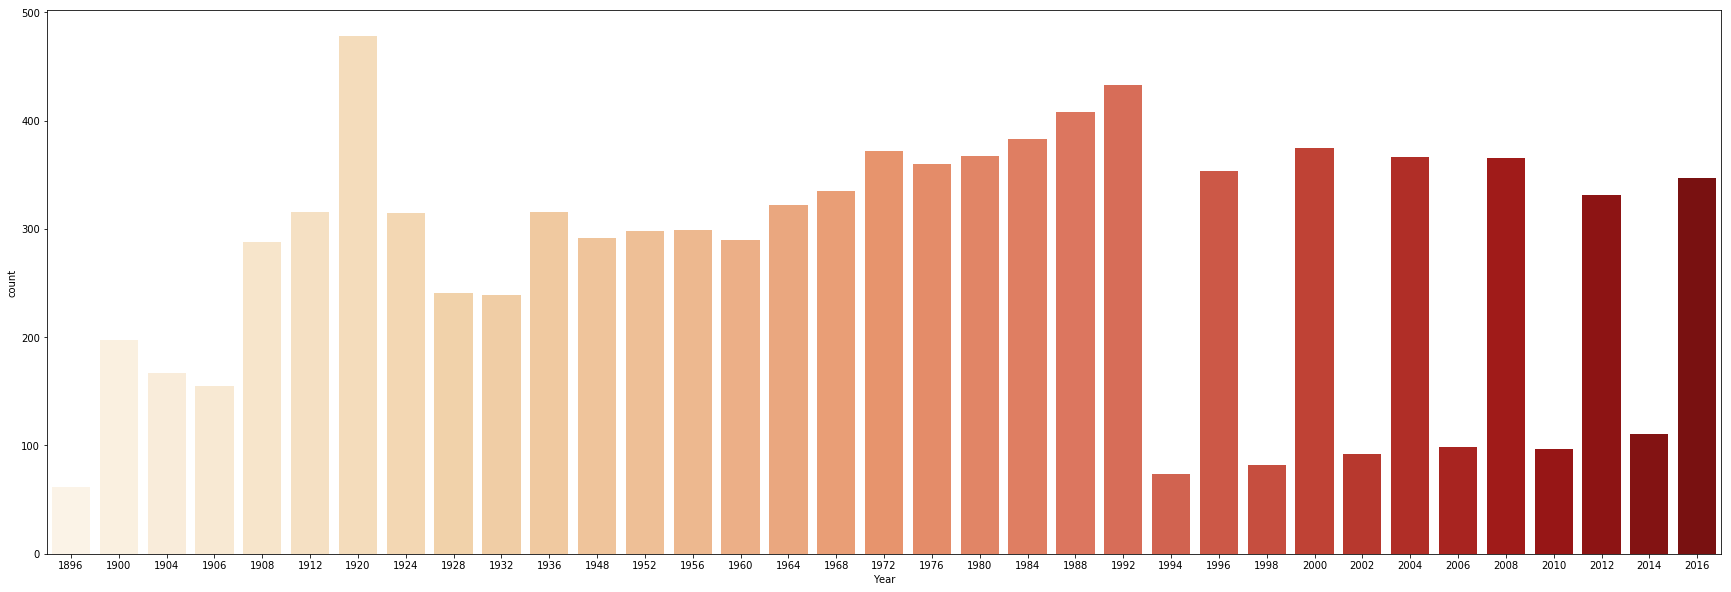

In [53]:
mens_medals_in_olympic = data[((data.Sex == 'M') & (data.Medal == 'Gold'))]
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=mens_medals_in_olympic,palette='OrRd');

# 11. Top 10 The most popular sports

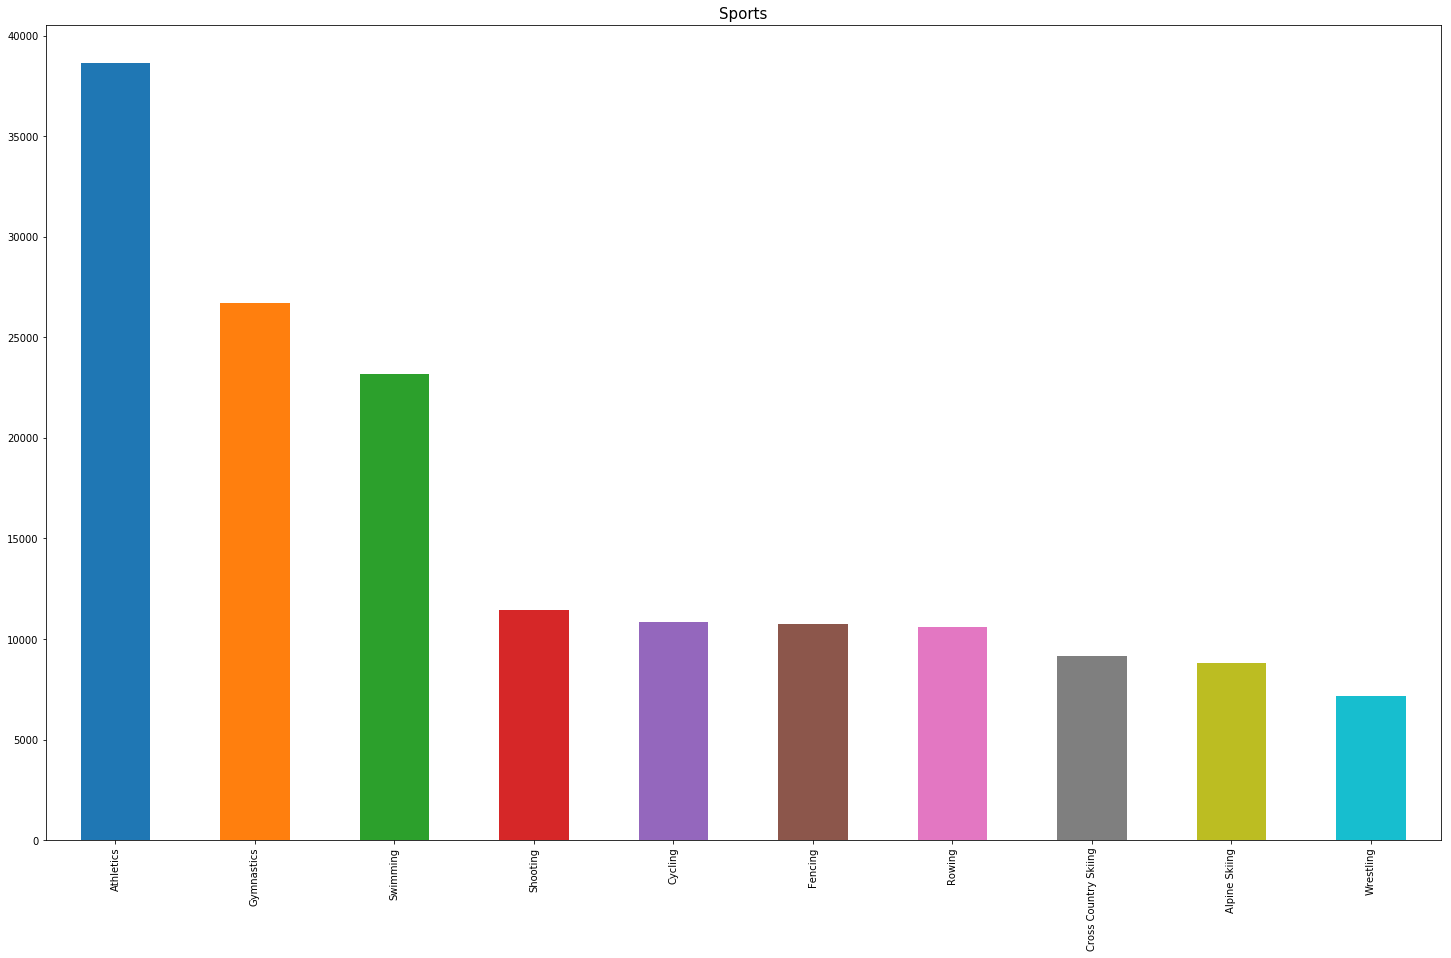

In [54]:
top10_sports = ((data.Sport).value_counts()).head(10)
plt.figure(figsize=(25,15))
plt.title('Sports',size=15)
top10_sports.plot(kind='bar');

## 11.1 Sports 1896


In [55]:
sports_1896 = data[(data.Year == 1896)].Sport.unique().tolist()
print('Total sports:',len(sports_1896))
print('Sports in 1896:')
sports_1896

Total sports: 9
Sports in 1896:


['Tennis',
 'Athletics',
 'Swimming',
 'Gymnastics',
 'Shooting',
 'Cycling',
 'Fencing',
 'Weightlifting',
 'Wrestling']

## The most popular sports 1896: 

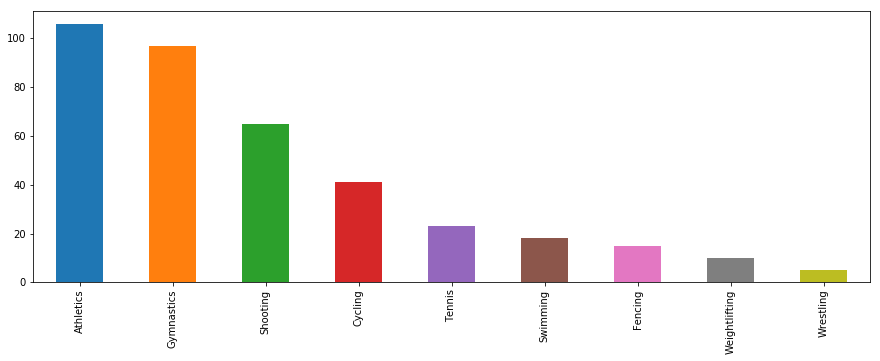

In [56]:
sports_1896_value = data[(data.Year == 1896)].Sport.value_counts()
plt.figure(figsize=(15,5))
sports_1896_value.plot(kind='bar');

##  11.2 Sports 2016

In [57]:
sports_2016 = data[(data.Year == 2016)].Sport.unique().tolist()
print('Total sports:',len(sports_2016))
print('Sports in 2016:')
sports_2016

Total sports: 34
Sports in 2016:


['Weightlifting',
 'Gymnastics',
 'Athletics',
 'Rowing',
 'Taekwondo',
 'Handball',
 'Boxing',
 'Equestrianism',
 'Cycling',
 'Volleyball',
 'Diving',
 'Shooting',
 'Judo',
 'Football',
 'Synchronized Swimming',
 'Wrestling',
 'Fencing',
 'Swimming',
 'Badminton',
 'Rugby Sevens',
 'Table Tennis',
 'Water Polo',
 'Trampolining',
 'Basketball',
 'Triathlon',
 'Modern Pentathlon',
 'Sailing',
 'Beach Volleyball',
 'Golf',
 'Rhythmic Gymnastics',
 'Archery',
 'Hockey',
 'Canoeing',
 'Tennis']

## Top 10 The most popular games 2016:

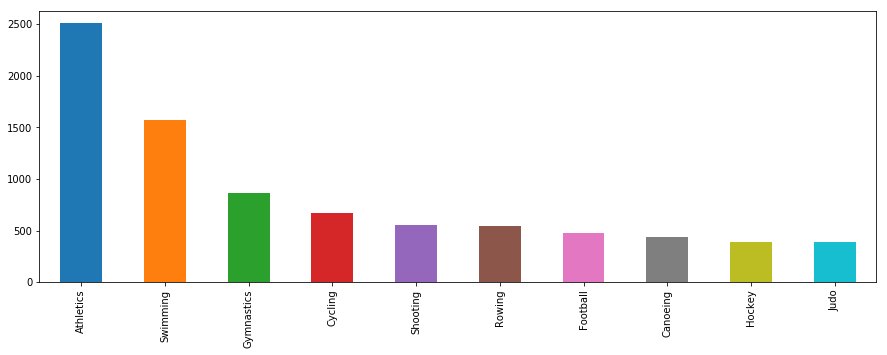

In [58]:
sports_2016_value = data[(data.Year == 2016)].Sport.value_counts().head(10)
plt.figure(figsize=(15,5))
sports_2016_value.plot(kind='bar');

## Womens popular sports:

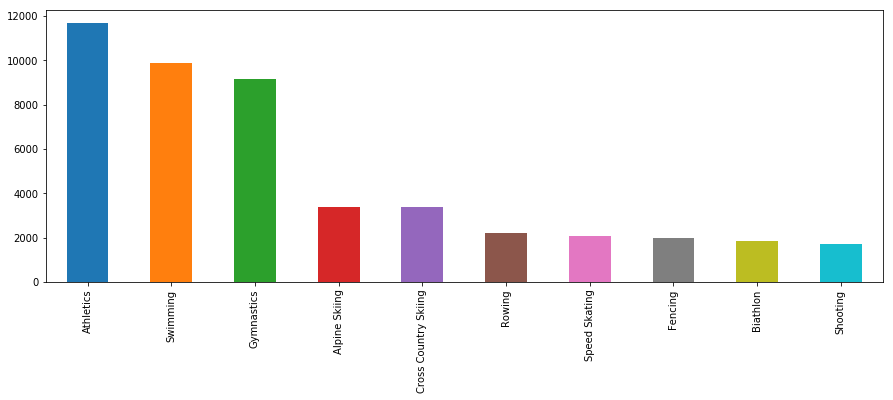

In [59]:
womens_sports = womens_in_olympic.Sport.value_counts().head(10)
plt.figure(figsize=(15,5))
womens_sports.plot(kind='bar');

## Mens popular sports:

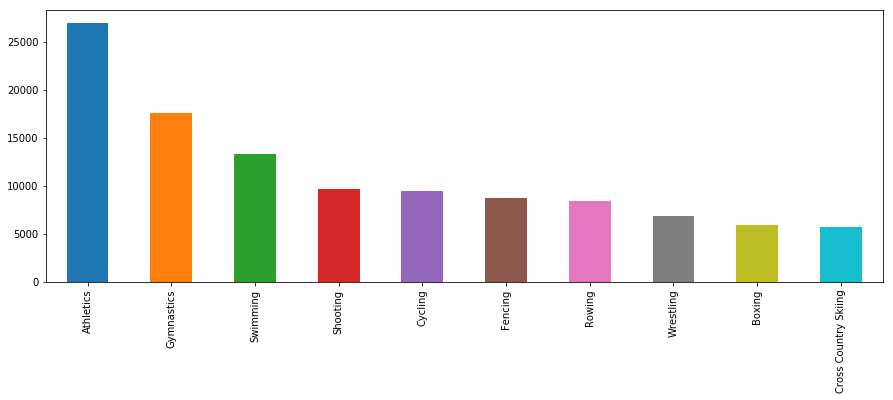

In [60]:
mens_sports = mens_in_olympic.Sport.value_counts().head(10)
plt.figure(figsize=(15,5))
mens_sports.plot(kind='bar');

# 12. Teams /To Do

## Top 10 Country

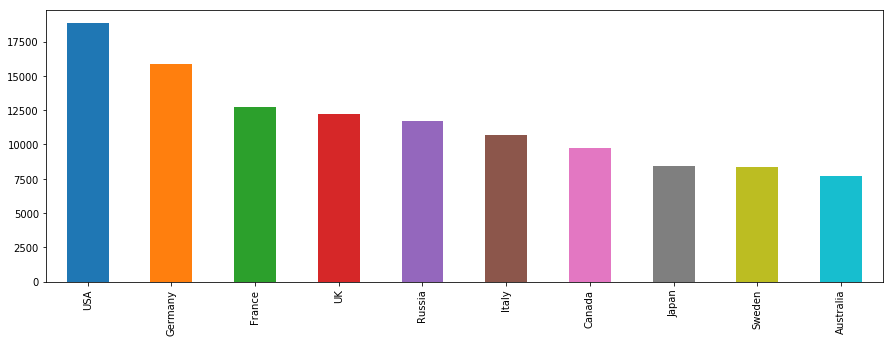

In [61]:
top10_country = data.region.value_counts()
plt.figure(figsize=(15,5))
top10_country.head(10).plot(kind='bar');

# 12.1 USA

![](https://upload.wikimedia.org/wikipedia/commons/a/a4/Flag_of_the_United_States.svg)

In [62]:
usa_region = data[data.region == 'USA']
usa_region.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


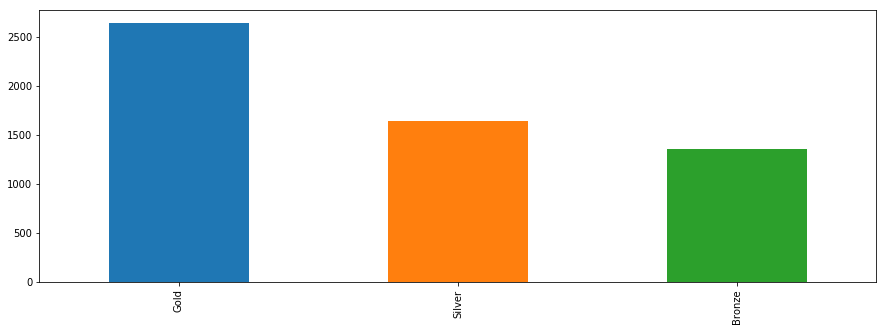

In [63]:
usa_medals = usa_region.Medal.value_counts()
plt.figure(figsize=(15,5))
usa_medals.plot(kind='bar');

In [64]:
gold_medals_usa = usa_region[(usa_region.Medal == 'Gold')]

In [65]:
gold_medals_usa.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Rowing Men's Coxed Eights,108
3,Swimming Men's 4 x 100 metres Medley Relay,108
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


# Basketball Analysis:

In [66]:
basketball = usa_region[(usa_region.Event == "Basketball Men's Basketball") & (usa_region.Medal == 'Gold')]

In [67]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,USA,NaN
4623,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold,USA,NaN
5031,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,USA,NaN
8165,4505,Carmelo Kyan Anthony,M,24.0,203.0,109.0,United States,USA,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,Gold,USA,NaN
8166,4505,Carmelo Kyan Anthony,M,28.0,203.0,109.0,United States,USA,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,NaN


In [68]:
print('Average Age: ', basketball.Age.mean())
print('Average Height: ', basketball.Height.mean())
print('Min Height: ', basketball.Height.min())
print('Max Height: ', basketball.Height.max())

Average Age:  24.77956989247312
Average Height:  196.9731182795699
Min Height:  177.0
Max Height:  216.0


## Boxplot Year - Age

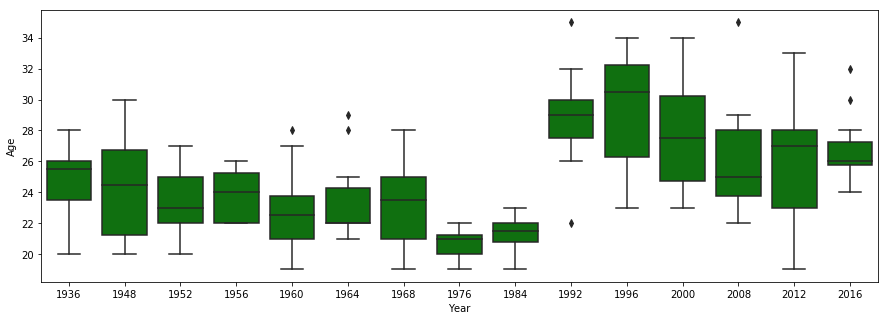

In [69]:
plt.figure(figsize=(15,5))
sns.boxplot('Year', 'Age', data=basketball, color ='green');

## Boxplot Year - Height

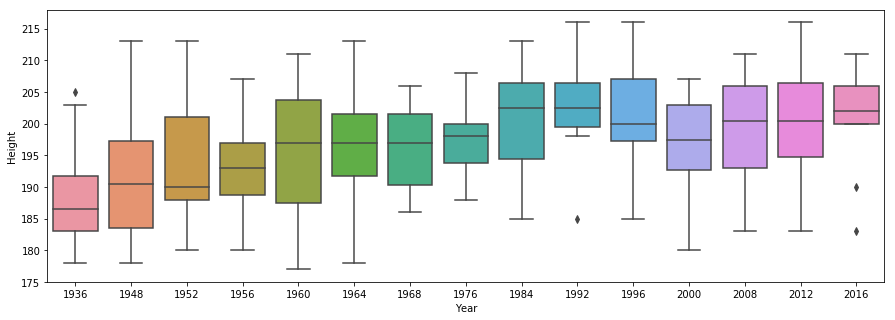

In [70]:
plt.figure(figsize=(15,5))
sns.boxplot('Year', 'Height', data=basketball);

## Boxplot Year - Weight

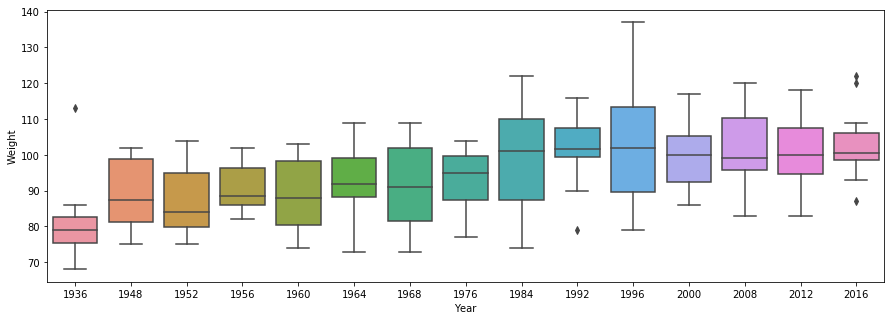

In [71]:
plt.figure(figsize=(15,5))
sns.boxplot('Year', 'Weight', data=basketball);

## Correlation Basketball players

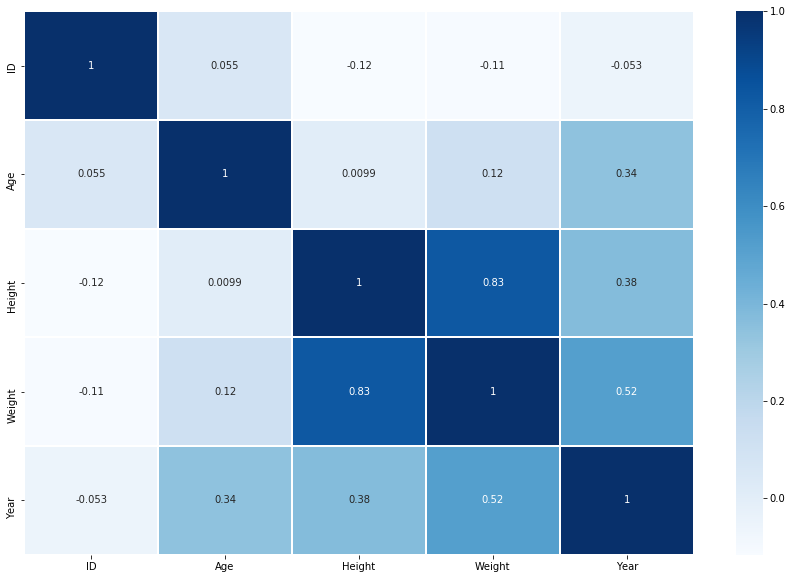

In [72]:
basketball_corr = basketball.corr()
plt.figure(figsize=(15,10))
sns.heatmap(basketball_corr,annot=True,lw=.8, cmap="Blues");

# Poland

In [73]:
#Flag

In [74]:
poland = data[data.region == 'Poland']

In [75]:
poland.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
901,513,Mariola Teresa Abrahamczyk (-Fronckowiak),F,21.0,180.0,70.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Rowing,Rowing Women's Coxed Quadruple Sculls,NaN,Poland,NaN
997,562,Pawe Abratkiewicz,M,21.0,183.0,84.0,Poland,POL,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Men's 500 metres,NaN,Poland,NaN
998,562,Pawe Abratkiewicz,M,21.0,183.0,84.0,Poland,POL,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,Poland,NaN
999,562,Pawe Abratkiewicz,M,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Men's 500 metres,NaN,Poland,NaN
1000,562,Pawe Abratkiewicz,M,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,Poland,NaN
1001,562,Pawe Abratkiewicz,M,31.0,183.0,84.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,Speed Skating Men's 500 metres,NaN,Poland,NaN
1002,562,Pawe Abratkiewicz,M,31.0,183.0,84.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,Poland,NaN
1325,745,Kazimierz Piotr Adach,M,23.0,162.0,60.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Boxing,Boxing Men's Lightweight,Bronze,Poland,NaN
1386,783,Stefan Adamczak,M,31.0,175.0,73.0,Poland,POL,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Pole Vault,NaN,Poland,NaN
1388,785,Dariusz Adamczuk,M,22.0,179.0,78.0,Poland,POL,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Silver,Poland,NaN


In [76]:
polish_athletes = len(poland.ID.unique())

In [77]:
polish_athletes

2970

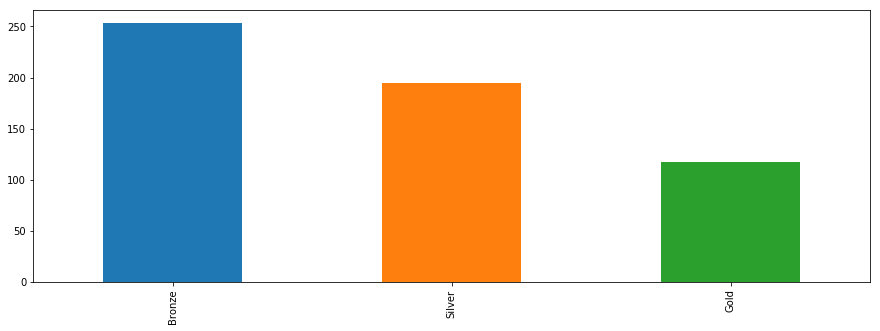

In [78]:
pl_medals = poland.Medal.value_counts()
plt.figure(figsize=(15,5))
pl_medals.plot(kind='bar');

In [79]:
pl_gold_medals = poland[poland.Medal == 'Gold']

In [80]:
pl_gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6542,3662,Zygmunt Jzef Anczok,M,26.0,178.0,77.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
15808,8525,Waldemar Romuald Baszanowski,M,29.0,165.0,65.5,Poland,POL,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Lightweight,Gold,Poland,NaN
15809,8525,Waldemar Romuald Baszanowski,M,33.0,165.0,65.5,Poland,POL,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Lightweight,Gold,Poland,NaN
16998,9104,Bronisaw Bebel,M,27.0,191.0,91.0,Poland,POL,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,Gold,Poland,NaN
23117,12154,Leszek Robert Blanik,M,31.0,163.0,64.0,Poland,POL,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Horse Vault,Gold,Poland,NaN


In [81]:
pl_gold_medals.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Football Men's Football,17
1,Volleyball Men's Volleyball,12
2,"Fencing Men's Foil, Team",5
3,Athletics Women's 4 x 100 metres Relay,4
4,Rowing Men's Lightweight Double Sculls,4
5,Rowing Men's Quadruple Sculls,4
6,Athletics Men's 50 kilometres Walk,3
7,Boxing Men's Lightweight,3
8,Modern Pentathlon Men's Team,3
9,Athletics Men's Shot Put,3


# Football Men's Football:

In [82]:
#![]('https://pl.wikipedia.org/wiki/Pi%C5%82ka_no%C5%BCna#/media/File:Football_iu_1996.jpg')

In [83]:
football_team = pl_gold_medals[pl_gold_medals.Event == "Football Men's Football"]
football_team

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6542,3662,Zygmunt Jzef Anczok,M,26.0,178.0,77.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
42834,22103,Lesaw mikiewicz,M,24.0,172.0,71.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
54599,28004,Kazimierz Deyna,M,24.0,179.0,72.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
74518,37853,Robert Gadocha,M,26.0,170.0,69.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
82381,41851,Jerzy Pawe Gorgo,M,23.0,187.0,88.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
87019,44138,Zbigniew Gut,M,23.0,179.0,77.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
121475,61419,Kazimierz Kmiecik,M,20.0,175.0,69.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
125071,63124,Hubert Jerzy Kostka,M,32.0,178.0,75.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
126444,63762,Jerzy Adam Kraska,M,20.0,176.0,70.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN
133140,67019,Grzegorz Bolesaw Lato,M,22.0,175.0,71.0,Poland,POL,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Gold,Poland,NaN


## Age

In [84]:
print('Average age:',football_team.Age.mean())

Average age: 24.764705882352942


## Height & Weight:

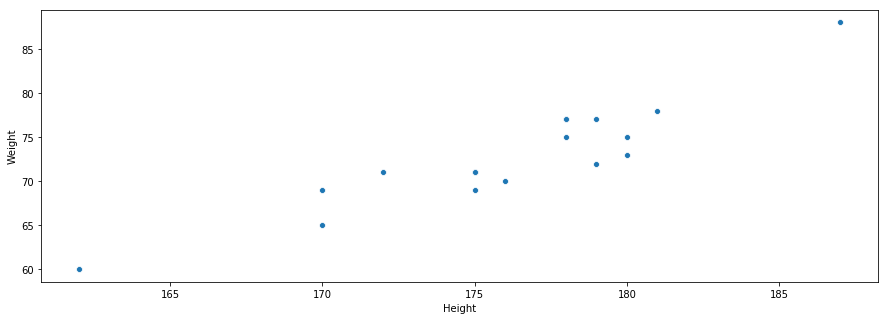

In [85]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Height',y='Weight',data=football_team);

In [86]:
print('Average Height:', football_team.Height.mean())
print('Average Weight:', football_team.Weight.mean())

Average Height: 176.1764705882353
Average Weight: 72.82352941176471


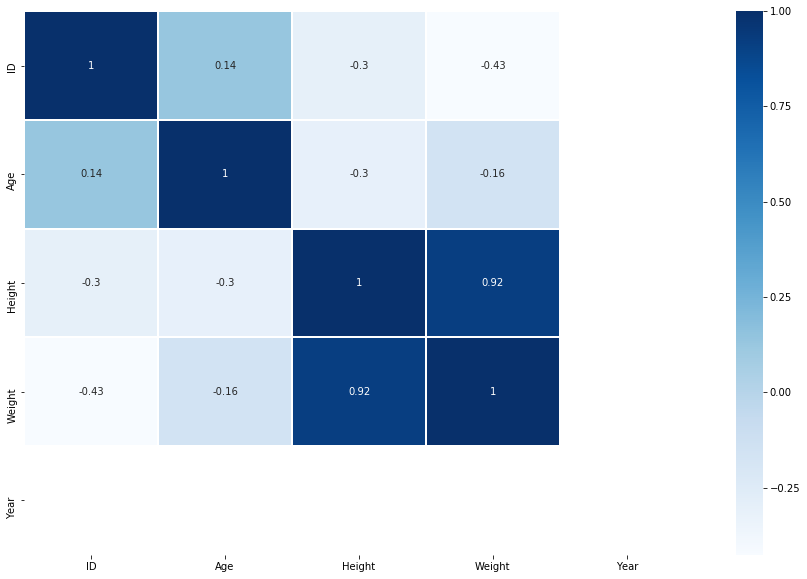

In [88]:
football_team_corr = football_team.corr()
plt.figure(figsize=(15,10))
sns.heatmap(football_team_corr,annot=True,lw=.8, cmap="Blues");